In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

df = pd.read_csv("Sales_data.csv")
print(df)
df.isnull().sum()

    Sale_ID Customer_Name Region     Category        Product  Quantity  \
0         1    Neha Singh  North    Groceries          Wheat         2   
1         2   Parth Patel   West  Electronics         Mobile         1   
2         3   Meera Menon  South       Sports  Gym Equipment         2   
3         4    Pooja Nair   West    Groceries           Milk         2   
4         5    Manoj Bhat  North    Groceries           Milk         5   
..      ...           ...    ...          ...            ...       ...   
60       61   Meera Menon   West    Furniture          Table         2   
61       62   Parth Patel   West    Furniture          Table         3   
62       63   Meera Menon  South    Furniture          Chair         3   
63       64    Manoj Bhat  South    Furniture          Chair         5   
64       65    Amit Verma   West     Clothing          Dress         2   

    Price_per_Unit  Total_Amount   Sale_Date  Discount Payment_Mode  \
0             1243          2486   1/12/

Sale_ID            0
Customer_Name      0
Region             0
Category           0
Product            0
Quantity           0
Price_per_Unit     0
Total_Amount       0
Sale_Date          0
Discount           0
Payment_Mode       0
Unnamed: 11       65
dtype: int64

#### Part 1: Matplotlib Visualization

In [2]:
plt.figure(figsize=(8,6))
#plt.legend()
print(df.head())




   Sale_ID Customer_Name Region     Category        Product  Quantity  \
0        1    Neha Singh  North    Groceries          Wheat         2   
1        2   Parth Patel   West  Electronics         Mobile         1   
2        3   Meera Menon  South       Sports  Gym Equipment         2   
3        4    Pooja Nair   West    Groceries           Milk         2   
4        5    Manoj Bhat  North    Groceries           Milk         5   

   Price_per_Unit  Total_Amount   Sale_Date  Discount Payment_Mode  \
0            1243          2486   1/12/2025      0.03  Credit Card   
1            1891          1891   4/29/2024      0.15  Credit Card   
2            3779          7558  10/28/2024      0.08  Credit Card   
3            1863          3726   1/25/2025      0.10  Credit Card   
4            2266         11330   1/23/2024      0.22  Credit Card   

   Unnamed: 11  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


<Figure size 800x600 with 0 Axes>

###### 1. Plot a line chart showing Total_Amount for the first 20 sales transactions (x-axis: Sale_ID, y-axis: Total_Amount). Customize line color, add markers for each point, and label the axes and title.

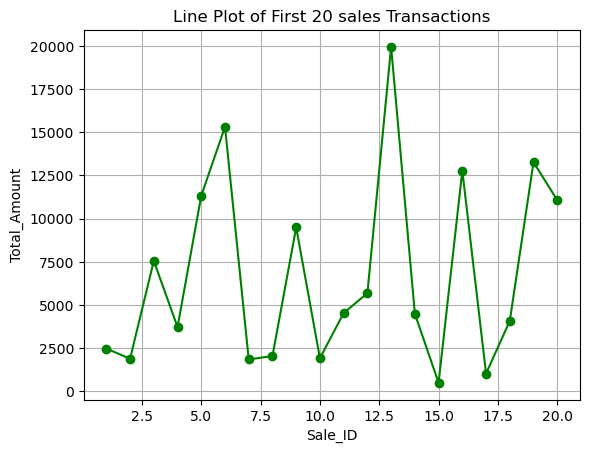

In [3]:
#df_subset = df.head(20)
plt.plot(df['Sale_ID'][:20], df['Total_Amount'][:20], color='Green', marker='o')
plt.title("Line Plot of First 20 sales Transactions")
plt.xlabel("Sale_ID")
plt.ylabel("Total_Amount")
plt.grid()
plt.show()

###### 2. Plot Total_Amount and Quantity on the same graph for the first 15 sales. Use different colors and line styles for each variable with a legend.

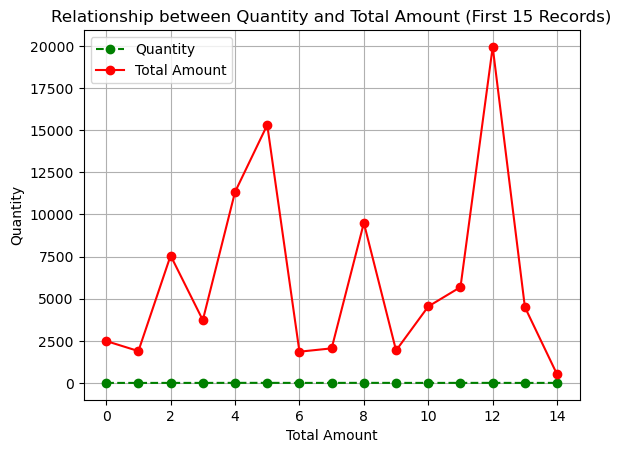

In [4]:
#df_subset_15 = df.head(15)
plt.plot(df['Quantity'][:15], marker='o', linestyle='--', color='green', label='Quantity')
plt.plot(df['Total_Amount'][:15], marker='o', linestyle='-', color='red', label='Total Amount')
plt.title('Relationship between Quantity and Total Amount (First 15 Records)')
plt.xlabel('Total Amount')
plt.ylabel('Quantity')
plt.grid(True)
plt.legend()
plt.show()



###### 3.Create a bar plot showing the total sales amount per Region using plt.bar(). Ensure each bar has a distinct color.

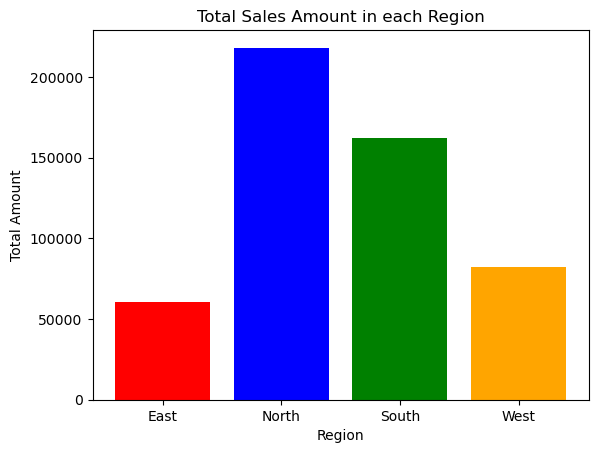

In [4]:
#print(df.duplicated().sum())
regions_sales = df.groupby('Region')['Total_Amount'].sum() # groups the total amont and sum up the all region total amount and plot graph 
plt.bar(regions_sales.index,regions_sales.values, color=['red', 'blue','green', 'Orange']) 
plt.title("Total Sales Amount in each Region")
plt.xlabel("Region")
plt.ylabel("Total Amount")
plt.show()

In [ ]:
###### 4. Create a scatter plot to visualize the relationship between Quantity and Total_Amount. Customize marker style and size.

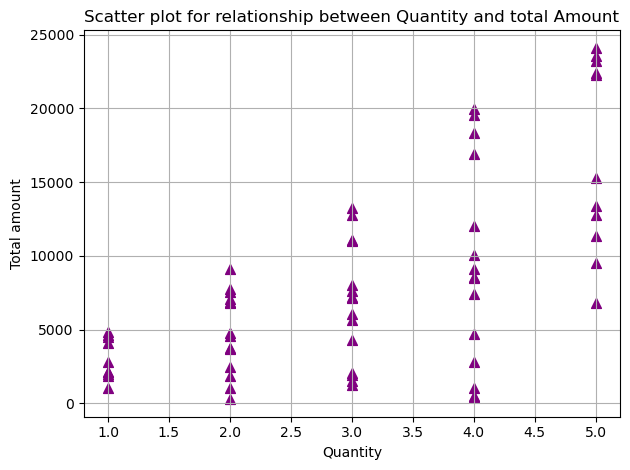

In [6]:
plt.scatter(df["Quantity"], df['Total_Amount'] , color='purple',  marker='^', s=50) # The 's' parameter controls the marker size
plt.xlabel("Quantity")
plt.ylabel("Total amount")
plt.title("Scatter plot for relationship between Quantity and total Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

###### 5.Plot a histogram showing the distribution of Price_per_Unit values. Use an appropriate number of bins and add edge colors.

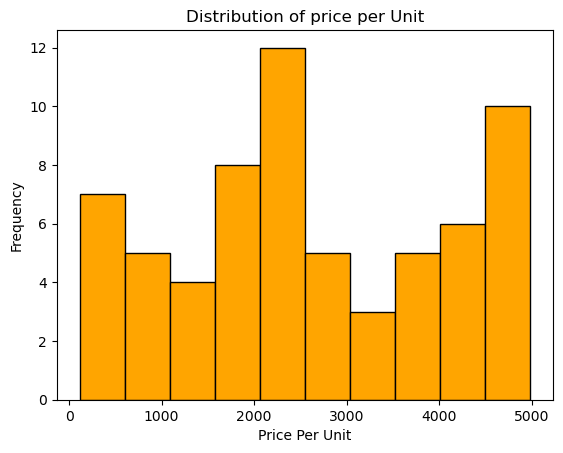

In [5]:
plt.hist(df['Price_per_Unit'], color='Orange', edgecolor='black', bins=10) # bins = number of columns ploted
plt.title("Distribution of price per Unit")
plt.xlabel("Price Per Unit")
plt.ylabel("Frequency")
plt.show()

##### 6.Create a pie chart showing the proportion of sales by Category. Add percentage labels and explode the largest slice.

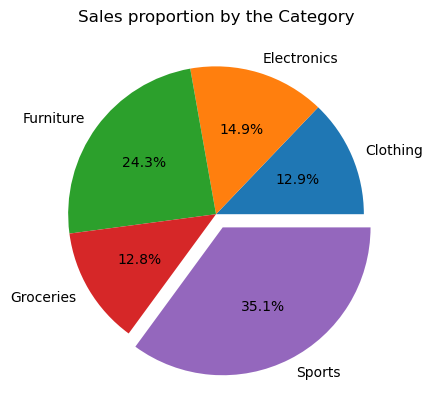

In [6]:
category_sales = df.groupby('Category')['Total_Amount'].sum()
explode=[0.1 if val == category_sales.max() else 0 for val in category_sales]
plt.pie(category_sales,labels=category_sales.index,autopct = '%1.1f%%',  explode=explode)
plt.title("Sales proportion by the Category")
plt.show()

##### 7. Create a box plot to visualize the spread of Total_Amount across different Region values. Identify any outliers.

C:\Users\HP\AppData\Local\Temp\ipykernel_11368\1634503766.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(region_data, labels=df['Region'].unique())


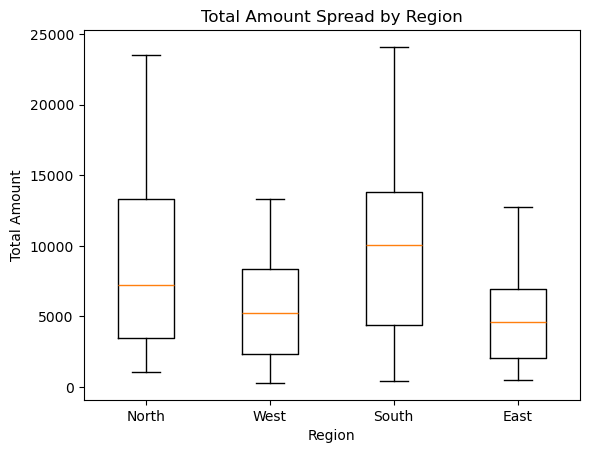

In [7]:
region_data = [df[df['Region'] == r]['Total_Amount'] for r in df['Region'].unique()]
plt.boxplot(region_data, labels=df['Region'].unique())
plt.xlabel("Region")
plt.ylabel("Total Amount")
plt.title("Total Amount Spread by Region")
plt.show()

##### 8.Create a 3D scatter plot with:

##### x-axis: Quantity

##### y-axis: Price_per_Unit

##### z-axis: Total_Amount

##### Color points by Region.

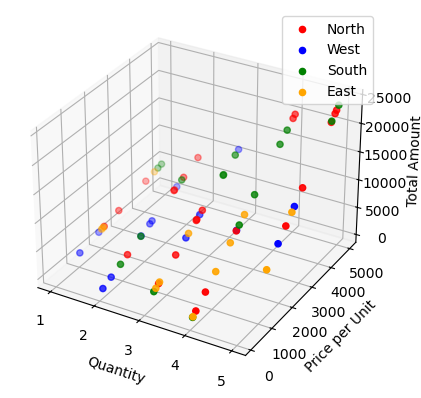

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
regions = df['Region'].unique()
colors = ['red', 'blue','green', 'orange']

for region, color in zip(regions, colors):
    subset = df[df['Region'] == region]
    ax.scatter(subset['Quantity'], subset['Price_per_Unit'], subset['Total_Amount'], color = color, label=region)

ax.set_xlabel("Quantity")
ax.set_ylabel('Price per Unit')
ax.set_zlabel('Total Amount')
ax.legend()
plt.show()

##### 9. Create a stacked bar chart showing total sales amount per Region, further divided by Category.

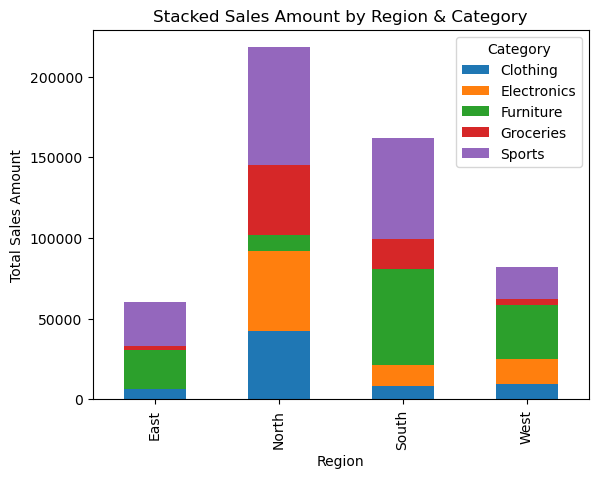

In [12]:
pivot_data = df.pivot_table(values='Total_Amount', index='Region', columns='Category', aggfunc='sum')
pivot_data.plot(kind='bar', stacked=True)
plt.title("Stacked Sales Amount by Region & Category")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.show()

In [11]:
"""A pivot table is a great way to summarize and aggregate data, which is exactly what's needed to create a stacked bar chart. 
In this case, the pivot table groups the Total_Amount by Region and Category, providing the necessary structure to visualize 
the total sales for each category stacked within each region."""

"A pivot table is a great way to summarize and aggregate data, which is exactly what's needed to create a stacked bar chart. \nIn this case, the pivot table groups the Total_Amount by Region and Category, providing the necessary structure to visualize \nthe total sales for each category stacked within each region."

##### 10. Plot a line chart showing the average Total_Amount per month based on the Sale_Date column.

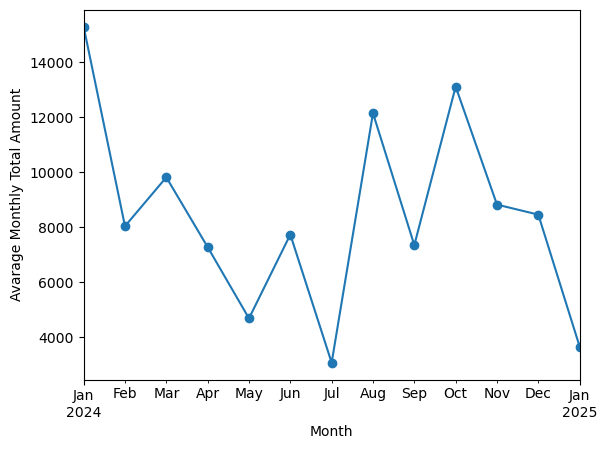

In [20]:
df['Month'] = pd.to_datetime(df['Sale_Date']).dt.to_period('M')
monthly_avg = df.groupby('Month')['Total_Amount'].mean()
monthly_avg.plot(kind='line', marker='o')
plt.xlabel("Month")
plt.ylabel("Avarage Monthly Total Amount")
plt.show()

#### Part 2: Seaborn Advanced Visualization

##### 11. Generate a correlation heatmap for numerical columns (Quantity, Price_per_Unit, Total_Amount, Discount) with annotated correlation values.

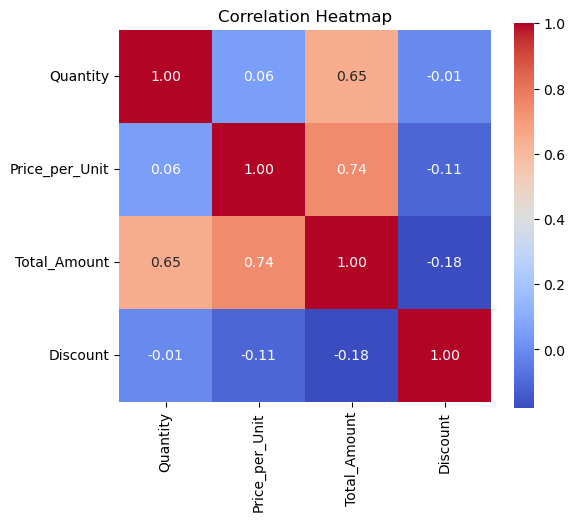

In [55]:
import seaborn as sns

num_cols = ['Quantity', 'Price_per_Unit', 'Total_Amount', 'Discount']
corr = df[num_cols].corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr, annot=True, fmt= '.2f', cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

##### 12.Create a cluster map to group numerical features based on similarity.

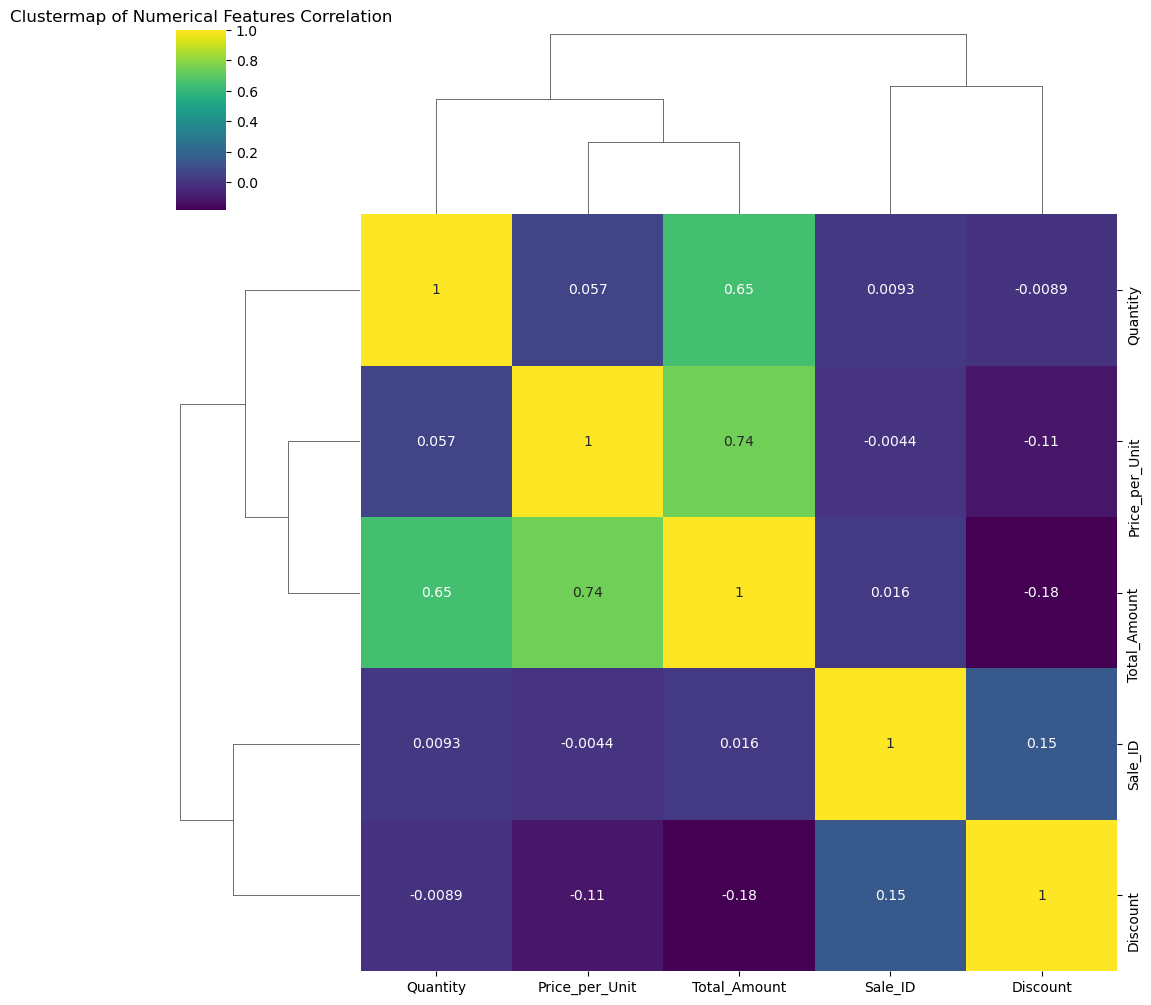

In [62]:
numerical_df = df.select_dtypes(include=np.number)
numerical_df = numerical_df.drop(columns=['Unnamed: 11'])
numerical_df = numerical_df.fillna(numerical_df.mean())
correlation_matrix = numerical_df.corr()
sns.clustermap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Clustermap of Numerical Features Correlation')
plt.show()

#####  13.Plot the ECDF of Discount to understand its distribution.

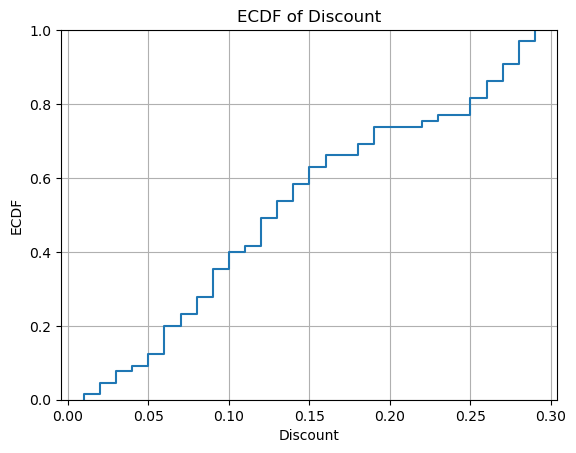

In [18]:
sns.ecdfplot(data=df, x='Discount')
plt.title('ECDF of Discount')
plt.xlabel('Discount')
plt.ylabel('ECDF')
plt.grid()
plt.show()

##### 14. Create a pair plot for numerical variables, using Region as the hue. Replace scatter plots with regression lines.

In [100]:
numerical_val = df.select_dtypes(include=np.number).drop(columns=['Unnamed: 11', 'Sale_ID']).columns
sns.pairplot(df, vars=numerical_val, hue='Region', kind='reg')
plt.suptitle("Pair Plot of Numerical Features by Region with Regression Lines", y=1.02)
plt.show()

KeyError: "['Unnamed: 11'] not found in axis"

##### 15. Create a joint plot showing the relationship between Quantity and Total_Amount, using hue=Category.

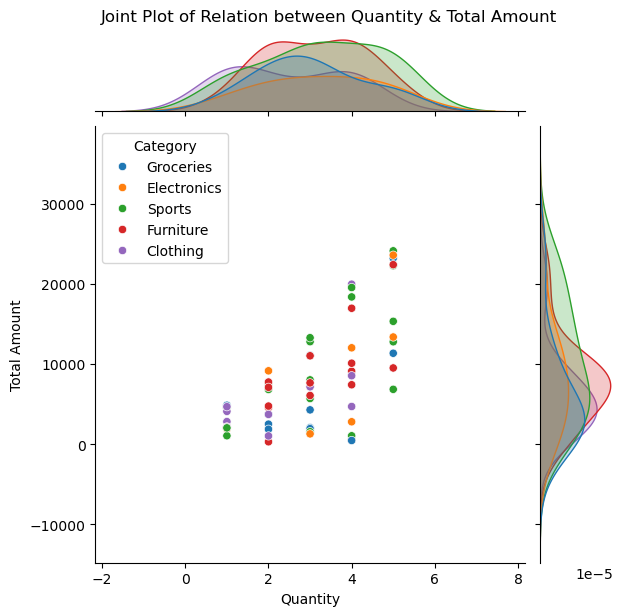

In [43]:
sns.jointplot(data=df, x='Quantity', y='Total_Amount', hue='Category')
plt.suptitle("Joint Plot of Relation between Quantity & Total Amount", y=1.02)
plt.xlabel("Quantity")
plt.ylabel('Total Amount')
plt.show()

##### 16.Create a box plot showing how Total_Amount varies by Payment_Mode.

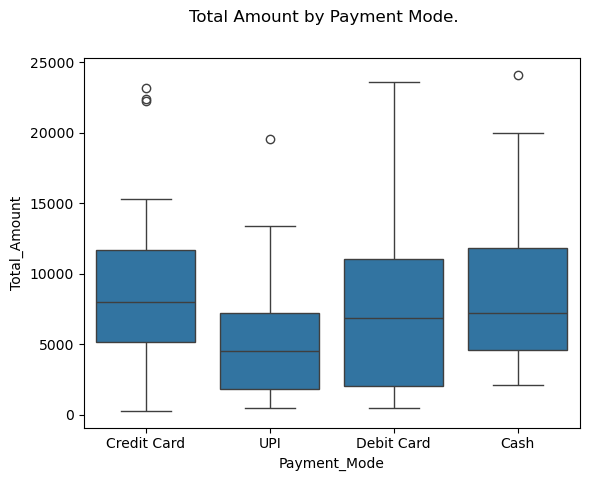

In [46]:
sns.boxplot(data=df, x='Payment_Mode', y='Total_Amount')
plt.suptitle("Total Amount by Payment Mode.")
plt.xlabel('Payment_Mode')
plt.ylabel('Total_Amount')
plt.show()

##### 17. Create a bubble plot where:

#### x-axis: Price_per_Unit
##### y-axis: Total_Amount
##### bubble size: Quantity
##### color: Category

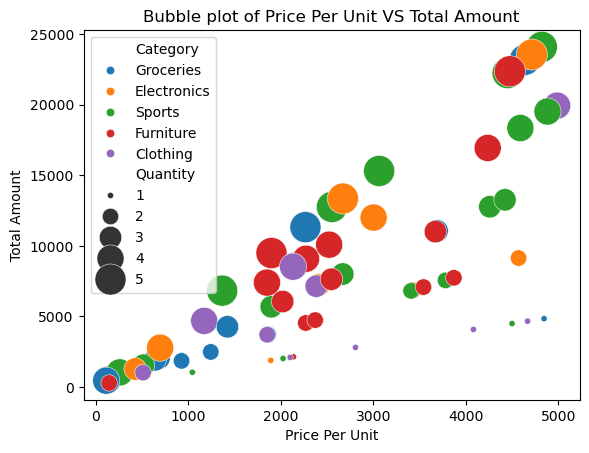

In [54]:
sns.scatterplot(data=df, x='Price_per_Unit', y='Total_Amount', size='Quantity', hue='Category', sizes=(20, 500))
plt.xlabel('Price Per Unit')
plt.ylabel("Total Amount")
plt.title("Bubble plot of Price Per Unit VS Total Amount")
plt.show()

##### 18. Create a violin plot comparing the distribution of Total_Amount for each Category.

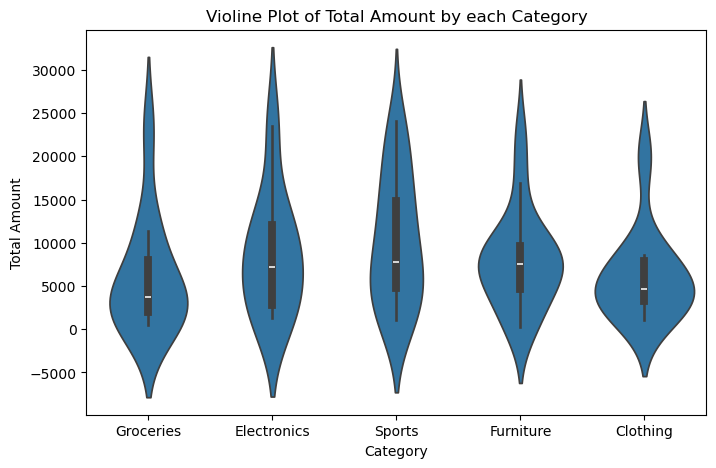

In [60]:
plt.figure(figsize= (8, 5))
sns.violinplot(data=df, x='Category', y='Total_Amount')
plt.xlabel("Category")
plt.ylabel("Total Amount")
plt.title("Violine Plot of Total Amount by each Category")
plt.show()

##### 19. Create a heatmap showing average Total_Amount for each combination of Region and Payment_Mode.

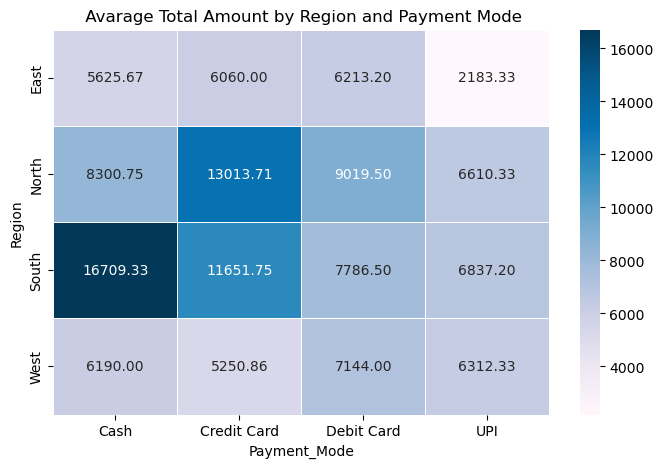

In [61]:
pivot = df.pivot_table(values='Total_Amount', index='Region', columns='Payment_Mode', aggfunc='mean')
plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot= True,fmt= '.2f', cmap='PuBu', linewidth=0.5)
plt.title(" Avarage Total Amount by Region and Payment Mode")
plt.show()

### Part 3: Pandas Data Cleaning & Indexing

##### 20. Display the total number of missing values per column.

In [65]:
miss_col_val = df.isnull()
display(miss_col_val)

,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode,Unnamed: 11
0,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
60,False,False,False,False,False,False,False,False,False,False,False,True
61,False,False,False,False,False,False,False,False,False,False,False,True
62,False,False,False,False,False,False,False,False,False,False,False,True
63,False,False,False,False,False,False,False,False,False,False,False,True


In [77]:
#df = df.drop(columns=['Unnamed: 11'])
display(df.head())

,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode
0,1,Neha Singh,North,Groceries,Wheat,2,1243,2486,1/12/2025,0.03,Credit Card
1,2,Parth Patel,West,Electronics,Mobile,1,1891,1891,4/29/2024,0.15,Credit Card
2,3,Meera Menon,South,Sports,Gym Equipment,2,3779,7558,10/28/2024,0.08,Credit Card
3,4,Pooja Nair,West,Groceries,Milk,2,1863,3726,1/25/2025,0.10,Credit Card
4,5,Manoj Bhat,North,Groceries,Milk,5,2266,11330,1/23/2024,0.22,Credit Card


In [76]:
display(df.head())

,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode
0,1,Neha Singh,North,Groceries,Wheat,2,1243,2486,1/12/2025,0.03,Credit Card
1,2,Parth Patel,West,Electronics,Mobile,1,1891,1891,4/29/2024,0.15,Credit Card
2,3,Meera Menon,South,Sports,Gym Equipment,2,3779,7558,10/28/2024,0.08,Credit Card
3,4,Pooja Nair,West,Groceries,Milk,2,1863,3726,1/25/2025,0.10,Credit Card
4,5,Manoj Bhat,North,Groceries,Milk,5,2266,11330,1/23/2024,0.22,Credit Card


##### 21. Using .loc, select all transactions from the North region where Quantity > 3.

In [83]:
North_tran = df.loc[(df['Region'] == 'North') & (df['Quantity'] > 3)]
display(North_tran)

,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode
4,5,Manoj Bhat,North,Groceries,Milk,5,2266,11330,1/23/2024,0.22,Credit Card
5,6,Manoj Bhat,North,Sports,Tennis Racket,5,3062,15310,10/22/2024,0.06,Credit Card
12,13,Priya Sharma,North,Clothing,Jeans,4,4985,19940,2/2/2024,0.12,Cash
16,17,Pooja Nair,North,Sports,Tennis Racket,4,259,1036,2/27/2024,0.28,UPI
20,21,Ananya Joshi,North,Groceries,Rice,5,4637,23185,4/27/2024,0.18,Credit Card
29,30,Priya Sharma,North,Sports,Gym Equipment,5,4450,22250,3/21/2024,0.02,Credit Card
31,32,Parth Patel,North,Sports,Football,4,4881,19524,10/16/2024,0.16,UPI
33,34,Harish Iyer,North,Electronics,Camera,5,4712,23560,2/21/2024,0.02,Debit Card
42,43,Ishita Roy,North,Clothing,Jacket,4,2132,8528,5/16/2024,0.05,Credit Card
53,54,Vikram Desai,North,Electronics,Laptop,4,696,2784,8/21/2024,0.12,Debit Card


##### 22.Using .iloc, select the first 5 rows and first 4 columns of the dataset.

In [89]:
first_five = df.iloc[:5, :4]
display(first_five)

,Sale_ID,Customer_Name,Region,Category
0,1,Neha Singh,North,Groceries
1,2,Parth Patel,West,Electronics
2,3,Meera Menon,South,Sports
3,4,Pooja Nair,West,Groceries
4,5,Manoj Bhat,North,Groceries


##### 23. Create a new column Final_Amount = Total_Amount - (Total_Amount × Discount).

In [93]:
df['Final_Amount'] = df['Total_Amount'] - (df['Total_Amount'] * df['Discount'])
display(df.head(5))

,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode,Final_Amount
0,1,Neha Singh,North,Groceries,Wheat,2,1243,2486,1/12/2025,0.03,Credit Card,2411.42
1,2,Parth Patel,West,Electronics,Mobile,1,1891,1891,4/29/2024,0.15,Credit Card,1607.35
2,3,Meera Menon,South,Sports,Gym Equipment,2,3779,7558,10/28/2024,0.08,Credit Card,6953.36
3,4,Pooja Nair,West,Groceries,Milk,2,1863,3726,1/25/2025,0.10,Credit Card,3353.40
4,5,Manoj Bhat,North,Groceries,Milk,5,2266,11330,1/23/2024,0.22,Credit Card,8837.40


##### 24. Sort the dataset by Total_Amount in descending order.

In [97]:
df_sorted = df.sort_values(by='Total_Amount', ascending=False)
display(df_sorted)

,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode,Final_Amount
22,23,Simran Kaur,South,Sports,Cricket Bat,5,4820,24100,8/30/2024,0.07,Cash,22413.00
33,34,Harish Iyer,North,Electronics,Camera,5,4712,23560,2/21/2024,0.02,Debit Card,23088.80
20,21,Ananya Joshi,North,Groceries,Rice,5,4637,23185,4/27/2024,0.18,Credit Card,19011.70
63,64,Manoj Bhat,South,Furniture,Chair,5,4475,22375,1/14/2024,0.27,Credit Card,16333.75
29,30,Priya Sharma,North,Sports,Gym Equipment,5,4450,22250,3/21/2024,0.02,Credit Card,21805.00
...,...,...,...,...,...,...,...,...,...,...,...,...
16,17,Pooja Nair,North,Sports,Tennis Racket,4,259,1036,2/27/2024,0.28,UPI,745.92
64,65,Amit Verma,West,Clothing,Dress,2,511,1022,5/13/2024,0.11,Debit Card,909.58
14,15,Neha Singh,East,Furniture,Chair,4,126,504,1/4/2025,0.26,UPI,372.96
47,48,Manoj Bhat,South,Groceries,Rice,4,113,452,9/23/2024,0.28,Debit Card,325.44


##### 25. Replace any missing values in Discount with the column’s average.

In [104]:
dicount_avg = df['Discount'].mean()
df['Discount'].fillna(dicount_avg, inplace=True)
##print(df['Discount'].isnull().sum())
#display(df)

##### 26. Using .loc, select all transactions where Payment_Mode is "Cash" and Price_per_Unit > 500.

In [114]:
pay_mode = df.loc[(df['Payment_Mode'] == "Cash") & (df['Price_per_Unit'] > 500)]
display(pay_mode)

,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode,Final_Amount
12,13,Priya Sharma,North,Clothing,Jeans,4,4985,19940,2/2/2024,0.12,Cash,17547.20
22,23,Simran Kaur,South,Sports,Cricket Bat,5,4820,24100,8/30/2024,0.07,Cash,22413.00
24,25,Neha Singh,North,Furniture,Sofa,1,2136,2136,4/8/2024,0.06,Cash,2007.84
26,27,Priya Sharma,North,Electronics,Laptop,2,3429,6858,9/5/2024,0.14,Cash,5897.88
27,28,Priya Sharma,South,Furniture,Table,4,2272,9088,8/20/2024,0.09,Cash,8270.08
32,33,Sandeep Reddy,East,Clothing,Jacket,4,1172,4688,12/9/2024,0.19,Cash,3797.28
34,35,Aditya Jain,East,Clothing,Jacket,1,2101,2101,7/8/2024,0.09,Cash,1911.91
38,39,Priya Sharma,North,Groceries,Wheat,3,1423,4269,1/14/2025,0.13,Cash,3714.03
49,50,Aditya Jain,East,Furniture,Sofa,4,2522,10088,10/10/2024,0.04,Cash,9684.48
56,57,Rohit Malhotra,South,Furniture,Sofa,4,4235,16940,8/6/2024,0.25,Cash,12705.00


#### Part 4: Short Python Coding Tasks

##### 27. Calculate the total sales amount for each Category.

In [138]:
Total_sales = df.groupby('Category')['Total_Amount'].sum()
display(Total_sales)

Category
Clothing        67266
Electronics     78096
Furniture      127126
Groceries       67188
Sports         183383
Name: Total_Amount, dtype: int64

##### 28. Find the top 3 products by total revenue.

In [140]:
top_products = df.groupby('Product')['Total_Amount'].sum().sort_values(ascending=False)
top_products.head(3)


Product
Football         56370
Gym Equipment    51881
Sofa             43401
Name: Total_Amount, dtype: int64

##### 29. Display the average discount given in the West region.

In [163]:
west_region = df[df['Region'] == "West"]
Avg_discount = west_region['Discount'].mean()
#display(Avg_discount
print(f"Avarage Discount given in West Region is: {Avg_discount:.2f}")

# df['Discount'].mean()]

Avarage Discount given in West Region is: 0.15


##### 30. Filter and display all sales where Payment_Mode is "UPI" and Quantity > 2.

In [166]:
Sales = df.loc[(df['Payment_Mode'] == "UPI") & (df['Quantity'] > 2)]
display(Sales)

,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode,Final_Amount
9,10,Ananya Joshi,North,Groceries,Vegetables,3,642,1926,4/18/2024,0.27,UPI,1405.98
14,15,Neha Singh,East,Furniture,Chair,4,126,504,1/4/2025,0.26,UPI,372.96
15,16,Aditya Jain,South,Sports,Football,3,4258,12774,11/7/2024,0.06,UPI,12007.56
16,17,Pooja Nair,North,Sports,Tennis Racket,4,259,1036,2/27/2024,0.28,UPI,745.92
31,32,Parth Patel,North,Sports,Football,4,4881,19524,10/16/2024,0.16,UPI,16400.16
36,37,Kunal Mehta,North,Electronics,Laptop,3,2408,7224,11/5/2024,0.06,UPI,6790.56
37,38,Sandeep Reddy,East,Sports,Gym Equipment,3,516,1548,2/17/2024,0.19,UPI,1253.88
44,45,Ananya Joshi,North,Clothing,Dress,3,2382,7146,2/5/2024,0.29,UPI,5073.66
48,49,Swati Agarwal,West,Electronics,Headphones,5,2671,13355,12/5/2024,0.25,UPI,10016.25
62,63,Meera Menon,South,Furniture,Chair,3,3670,11010,9/5/2024,0.01,UPI,10899.90


##### 31. Show the transaction with the highest profit margin, assuming profit_margin = (Total_Amount × 0.2).

In [30]:
df['Profit_Margin'] = df['Total_Amount'] * 0.2
highest_profit_tran = df.loc[df['Profit_Margin'].idxmax()]
display(highest_profit_tran)

Sale_ID                    23
Customer_Name     Simran Kaur
Region                  South
Category               Sports
Product           Cricket Bat
Quantity                    5
Price_per_Unit           4820
Total_Amount            24100
Sale_Date           8/30/2024
Discount                 0.07
Payment_Mode             Cash
Unnamed: 11               NaN
Profit_Margin          4820.0
Name: 22, dtype: object

##### 32. Find the Region with the highest average Final_Amount.

In [14]:
region_avarge = df.groupby('Region')['Total_Amount'].mean()
highest_avg_region = region_avarge.idxmax()
highest_avg = region_avarge.max()
#display(region_avarge)
print(f"Region with the highest average {highest_avg_region} :{highest_avg:.2f} " )

Region with the highest average South :10129.19 


##### 33. Calculate the percentage contribution of each Category to total sales revenue.

In [27]:
categories_revanue = df.groupby('Category')['Total_Amount'].sum()
total_revanue = df['Total_Amount'].sum()
category_percent = (categories_revanue/total_revanue) * 100
print("Percentage contribution of each Category to total sales revenue:")
display(category_percent.sort_values(ascending=False))

Percentage contribution of each Category to total sales revenue:


Category
Sports         35.059716
Furniture      24.304333
Electronics    14.930629
Clothing       12.860117
Groceries      12.845205
Name: Total_Amount, dtype: float64